# Data

The data being analyzed contains the aggregate statistics of individual NBA players from 1950 - 2017. The data was scrapped from [Basketball Reference](https://www.basketball-reference.com) and contains players counting statistics (points, steals, block etc.) as well as advanced statistics such as win share and value over replacement.
This data will be used to help identify what should be considered an average NBA player, and who a NBA general manager should be targeting in free agency to help improve his team. This will be accomplished by answering the following three questions :
  1.	What defines an league average NBA player?
  2.	At what age does an NBA player hit his statistical peak?
  3.	Which position holds the most value to an NBA team?


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
%matplotlib inline
nba_players= pd.read_csv('Seasons_Stats.csv')
nba_players

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


The main statistics we will from using in this data set are Games (G) , Rebounds(TRB), Assist(AST), Steals, (STL), Blocks (BLK), Points (PTS) and Win Shares (WS).

#  1.	What defines an league average NBA player?

In order to compare players, we will be looking at five  counting statistics:  
- Points
- Rebounds
- Assist
- Steals
- Blocks 

Rather than looking at the accumulative totals per season we will be looking at per game averages. Looking at per game stats is beneficial because it takes into account that the number of games per season has changed over NBA history while also accounting for players who did  not play a full season.

In [61]:
###add per game stats to the data frame

nba_players['Points Per Game'] = nba_players['PTS']/nba_players['G']
nba_players['Rebounds Per Game'] = nba_players['TRB']/nba_players['G']
nba_players['Assist Per Game'] = nba_players['AST']/nba_players['G']
nba_players['Steals Per Game'] = nba_players['STL']/nba_players['G']
nba_players['Blocks Per Game'] = nba_players['BLK']/nba_players['G']

### return average players stats
print('The average NBA player averages ' + str(round(np.mean(nba_players['Points Per Game']),2)) + ' points per game, '
       + str(round(np.mean(nba_players['Rebounds Per Game']),2)) + ' rebounds per game, '
       + str(round(np.mean(nba_players['Assist Per Game']),2)) + ' assists per game, ' 
       + str(round(np.mean(nba_players['Steals Per Game']),2)) + ' steals per game, and ' 
       + str(round(np.mean(nba_players['Blocks Per Game']),2)) + ' blocks per game.' )

The average NBA player averages 8.31 points per game, 3.73 rebounds per game, 1.89 assists per game, 0.67 steals per game, and 0.41 blocks per game.


Further investigation of the raw data shows that steals and blocks were not being tracked until the 1978 season. In addition during the 1979 season the NBA introduced a major rule change, the three point line. Because steals and blocks were not being accounted for in the early data and the three point line introduced a "new era of basketball"- I concluded it would be beneficial to only look at data from the 1979 season onwards.

In [62]:
### create new data frame only looking at year 1979 and beyond
nba_players_modern_era = nba_players.loc[lambda df: nba_players['Year'] >= 1979,:]

## return modern era averages
print('The average NBA player averages ' + str(round(np.mean(nba_players_modern_era['Points Per Game']),2)) + ' points per game, ' 
    + str(round(np.mean(nba_players_modern_era['Rebounds Per Game']),2)) + ' rebounds per game, ' 
    + str(round(np.mean(nba_players_modern_era['Assist Per Game']),2)) + ' assists per game, ' 
    + str(round(np.mean(nba_players_modern_era['Steals Per Game']),2)) + ' steals per game, and ' 
    + str(round(np.mean(nba_players_modern_era['Blocks Per Game']),2)) + ' blocks per game. ') 

The average NBA player averages 8.07 points per game, 3.48 rebounds per game, 1.85 assists per game, 0.66 steals per game, and 0.41 blocks per game. 


It is interesting to note that despite the introduction of a shot that is worth 1.5 x more points, the scoring average of NBA players saw a decrease when comparing the data from 1979 - 2017 and 1950 - 2017.

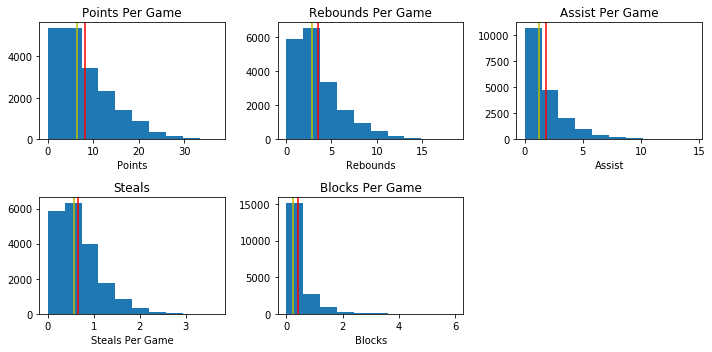

In [63]:
### plot out per game stats

### points per game
plt.figure(figsize=(10, 5))
plt.subplot(2, 3, 1)
plt.hist(nba_players_modern_era['Points Per Game'])
plt.xlabel('Points')
plt.axvline(np.mean(nba_players_modern_era['Points Per Game']),color='r')
plt.axvline(np.median(nba_players_modern_era['Points Per Game']),color='y')
plt.title('Points Per Game')

### rebounds per game
plt.subplot(2, 3, 2)
plt.hist(nba_players_modern_era['Rebounds Per Game'])
plt.xlabel('Rebounds')
plt.axvline(np.mean(nba_players_modern_era['Rebounds Per Game']),color='r')
plt.axvline(np.median(nba_players_modern_era['Rebounds Per Game']),color='y')
plt.title('Rebounds Per Game')

### assist per game
plt.subplot(2, 3, 3)
plt.hist(nba_players_modern_era['Assist Per Game'])
plt.xlabel('Assist')
plt.axvline(np.mean(nba_players_modern_era['Assist Per Game']),color='r')
plt.axvline(np.median(nba_players_modern_era['Assist Per Game']),color='y')
plt.title('Assist Per Game')

### steals per game
plt.subplot(2, 3, 4)
plt.hist(nba_players_modern_era['Steals Per Game'])
plt.xlabel('Steals Per Game')
plt.axvline(np.mean(nba_players_modern_era['Steals Per Game']),color='r')
plt.axvline(np.median(nba_players_modern_era['Steals Per Game']),color='y')
plt.title('Steals')

###blocks per game
plt.subplot(2, 3, 5)
plt.hist(nba_players_modern_era['Blocks Per Game'])
plt.xlabel('Blocks')
plt.axvline(np.mean(nba_players_modern_era['Blocks Per Game']),color='r')
plt.axvline(np.median(nba_players_modern_era['Blocks Per Game']),color='y')
plt.title('Blocks Per Game')


plt.tight_layout()
plt.show()

Once the averages were established, I plotted out histograms of the per game averages. Each histogram shows that none of the variables have a normal distribution. In fact, most players fall slightly under the average. In order to get a better understanding of a league average player's contributions to a team, a system is needed to look at the accumulative statistics a player compiles per game rather than each statistic individually. 

To try and simplify the data and look at a players total contributions, I adapted a the following scoring system where each statistic was given a weighted value. Rather than try and create a weighting system on my own, I have adapted the following system from the daily fantasy website Draft Kings. Draft Kings has created a weighting system based on the value of a stat to the overall teams performance. Draft Kings assigns Fantasy Points to each statistic as follows :


-  Point: 1 FTP 
-  Rebound: 1.25 FTP
-  Assist: 1.5 FTP
-  Steal: 2 FTP
-  Block: 2 FTP

The average NBA player contributes 17.29 Fantasy Points Per Game(FPPG)


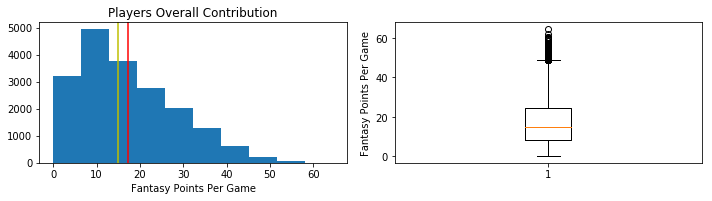

In [64]:
### calculate overall contribution 
nba_players['overall_contribution'] = (
    (nba_players['PTS']/nba_players['G']*1)+
    (nba_players['TRB']/nba_players['G']*1.25)+
    (nba_players['AST']/nba_players['G']*1.5)+
    (nba_players['STL']/nba_players['G']*2)+
    (nba_players['BLK']/nba_players['G']*2))

##return and plot average players contributions
nba_players_modern_era = nba_players.loc[lambda df: nba_players['Year'] > 1979,:]
print('The average NBA player contributes ' + str(round(np.mean(nba_players_modern_era['overall_contribution']),2)) + ' Fantasy Points Per Game(FPPG)' )
plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.hist(nba_players_modern_era['overall_contribution'])
plt.axvline(np.mean(nba_players_modern_era['overall_contribution']),color='r')
plt.axvline(np.median(nba_players_modern_era['overall_contribution']),color='y')
plt.title('Players Overall Contribution')
plt.xlabel('Fantasy Points Per Game')

plt.subplot(2, 2, 2)
plt.boxplot(nba_players_modern_era['overall_contribution'])
plt.ylabel('Fantasy Points Per Game')
plt.tight_layout()
plt.show()

###box plot

By analyzing a players value in terms of FPPG - we can get an much better idea of what an average players impact 
on a game should be. We can conclude that a league average NBA player should contribute 17.29 Fantasy Points per game. While the mean is not typically the ideal way to look at data that is not normally distributed, it does provide us a baseline for an NBA players production and what an "average" NBA player should contribute to a team. 

The box graph  of Fantasy Points Per Game also shows us a large number of outliers- and how that truly elite players are far more valuable than a league average player.


# 2)  What age does an NBA player hit his statistical peak?

In addition to understanding what an average player's contribution is to an NBA game, it would be ideal for teams to understand at what age is a players value at its highest and when they should expect to see a significant decline in a players production.

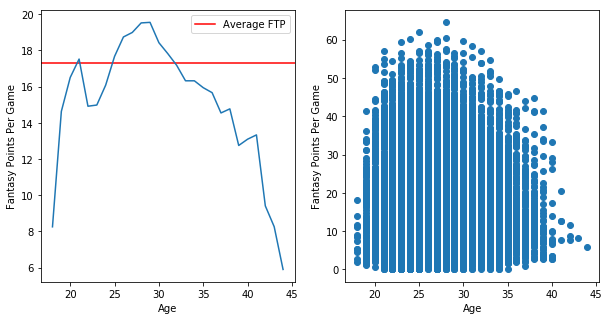

In [65]:
### group by age
nba_age=nba_players_modern_era.groupby('Age')['overall_contribution'].mean()

### plot overall contribution by age
z= np.mean(nba_players_modern_era['overall_contribution'])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axhline(z,color='r',label = 'Average FTP')
plt.plot(nba_age,label = '')
plt.ylabel('Fantasy Points Per Game')
plt.xlabel('Age')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x=nba_players_modern_era['Age'],y=nba_players_modern_era['overall_contribution'])
plt.ylabel('Fantasy Points Per Game')
plt.xlabel('Age')


plt.show()
## scatter plot on the side ##meadian in green

The graph shows us that players peak years are from 25-32, as these are the years they are most likely to produce above league average FPPG. After 32 they see a steady drop off year over year until age 41 where they see an major drop off, although few players seem to make it to this age. This data suggest that a team should target players at age 24/25 on five year contracts as they will likely see the players peak performance during these years. 

# Most Valuable Position in NBA ?

In order to determine value by position, I have chosen to compare positions by win shares.[Basketball Reference](https://www.basketball-reference.com/about/ws.html) describes win shares as follows:

 >Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. Full details are available below, but the important things to note are that it is calculated using player, team and league-wide statistics and the sum of player win shares on a given team will be roughly equal to that team’s win total for the season.Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. Full details are available below, but the important things to note are that it is calculated using player, team and league-wide statistics and the sum of player win shares on a given team will be roughly equal to that team’s win total for the season.


I have chosen to look at win shares by the standard three positions: Guard, Forward and Center. If a player is listed with multiple positions, I will include them in both categories as it is impossible to determine how much playing time each player was receiving at each position without further analysis. In addition, the move to "position-less" basketball, has made it so that determining what exact position the player is occupying on the court at a given time is not always clear.

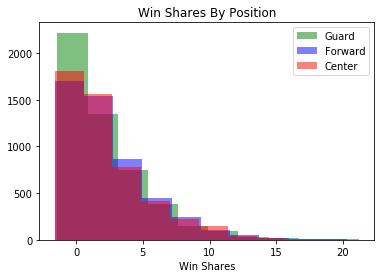

The average WS for a guard is 2.3
The average WS for a foward is 2.5
The average WS for a center is 2.41


F_onewayResult(statistic=9.155675779971034, pvalue=0.00010621016042442819)

In [59]:
### create the guard data frame
nba_players_wp =nba_players.loc[lambda df: nba_players['Year']>= 1979,:]
guard=nba_players_wp.fillna('-')
guard.loc[guard['Pos'].str.contains('G',case=False),'Pos'] = 'Guard'
guard=guard.loc[lambda df:guard['Pos']== 'Guard',:]
guard_ws = np.random.choice(guard['WS'], 5000, replace=True)

### create a forward data frame
forward=nba_players_wp.fillna('-')
forward.loc[forward['Pos'].str.contains('F',case=False),'Pos'] = 'Forward'
forward=forward.loc[lambda df:forward['Pos']== 'Forward',:]
forward_ws = np.random.choice(forward['WS'], 5000, replace=True)

### create a center data frame
center=nba_players_wp.fillna('-')
center.loc[center['Pos'].str.contains('C',case=False),'Pos'] = 'Center'
center=center.loc[lambda df:center['Pos']== 'Center',:]
center_ws = np.random.choice(center['WS'], 5000, replace=True)

### plot histogram by position
plt.hist(guard_ws,alpha=0.5,color = 'g', label='Guard')
plt.hist(forward_ws, alpha=0.5, color = 'b', label = 'Forward')
plt.hist(center_ws,alpha=0.5, color ='r', label = 'Center')
plt.xlabel('Win Shares')
plt.title('Win Shares By Position')
plt.title('Win Shares By Position')
plt.legend(loc='upper right') 
plt.show()

print('The average WS for a guard is '+ str(round(np.mean(guard['WS']),2)))
print('The average WS for a foward is '+ str(round(np.mean(forward['WS']),2)))
print('The average WS for a center is '+ str(round(np.mean(center['WS']),2)))

stats.f_oneway(guard_ws, forward_ws, center_ws)


**While it would be more logical to analysis all the data, for this capstone project I have chosen to use a sample to get practice working with them.**


By conducting a ANOVA test and examining the statistic and p value we are able to conclude that there is a significant in win shares between the different positions considered. Because we are comparing three variables we were not able to conduct a t test on our data.

The data shows that forwards(2.5 WS) are the most valuable to a team in terms of win shares, followed by centers(2.4 WS) and finally guards(2.3 WS). Given the value of forwards, General Managers should devote more resources to acquiring top tier talent at the forward position.


# Conclusion

After examining the data we can conclude that : 
- The average NBA player contributes 17.29 fantasy points per game.
- An NBA player will likely hit his peak at age 30, and have a steady decline from age thirty onward.
- The most valuable position in the NBA is the forward, followed by the center and then finally  the guard.


While people constructing basketball teams are obviously going to be aiming for elite talent rather than just finding players who are league average, having a way to evaluate how much a player is going to contribute to your teams success and at what age that players contributions to will begin to fall off is key to building a successful team. Especially with the salary cap rules in place, if a team is able to find above league average players who are entering the prime years of their career to supplement super star elite players, they are much more likely to find success. A general manager should also focus more of his attention on the forward position, as that position has the highest value to his team.


# Additional Research

Research should be conducted to see if the positions win share value is projected to change. The NBA seems to have an increasing amount of guard talent and less and less centers. How has the value of guards changed over time and is it possible to project if a guards value will surpass that of centers or forwards in the near future. If the league is changing, key decision makers need to project these changes and try and get ahead of the curve rather than continue to do what worked 10 years ago.